In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout
from keras.layers import GRU, Bidirectional
from keras.optimizers import SGD
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from datetime import datetime, timedelta
from sklearn.metrics import mean_absolute_error

/Users/thilina/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
file_path = "data/FPT_Damping_Scheme_Replacements.csv"
df_crude = pd.read_csv(file_path)
df_crude

,date,Crude_oil_price
0,2001-01-02,27.290000
1,2001-01-03,27.930000
2,2001-01-04,27.950000
3,2001-01-05,28.020000
4,2001-01-06,27.440000
...,...,...
8312,2023-10-06,71.354026
8313,2023-10-07,72.366662
8314,2023-10-08,72.366662
8315,2023-10-09,72.366662


In [3]:
df_crude_index = df_crude.set_index('date')
df_crude_index

,Crude_oil_price
date,
2001-01-02,27.290000
2001-01-03,27.930000
2001-01-04,27.950000
2001-01-05,28.020000
2001-01-06,27.440000
...,...
2023-10-06,71.354026
2023-10-07,72.366662
2023-10-08,72.366662


In [4]:
data = df_crude_index

In [5]:
# Setting 80 percent data for training
training_data_len = math.ceil(len(data) * .8)
training_data_len

#Splitting the dataset
train_data = data[:training_data_len].iloc[:,:1]
test_data = data[training_data_len:].iloc[:,:1]
print(train_data.shape, test_data.shape)

(6654, 1) (1663, 1)


In [6]:
# test_data_last_100 = test_data[-100:]

# plt.figure(figsize=(12, 6))
# plt.plot(test_data_last_100.index, test_data_last_100, color='blue', label='Test Data')
# plt.xlabel('Date')
# plt.ylabel('Value')
# plt.title('Test Data Plot')
# plt.legend()
# plt.show()

In [7]:
# Selecting Crude_oil_price values
dataset_train = train_data.Crude_oil_price.values

# Reshaping 1D to 2D array
dataset_train = np.reshape(dataset_train, (-1,1))
dataset_train.shape

(6654, 1)

In [8]:
scaler = MinMaxScaler(feature_range=(0,1))

# scaling dataset
scaled_train = scaler.fit_transform(dataset_train)
print(scaled_train[:5])

[[0.14077449]
 [0.14997732]
 [0.15026491]
 [0.15127147]
 [0.14293141]]


In [9]:
# Selecting Open Price values
dataset_test = test_data.Crude_oil_price.values

# Reshaping 1D to 2D array
dataset_test = np.reshape(dataset_test, (-1,1))

# Normalizing values between 0 and 1
scaled_test = scaler.fit_transform(dataset_test)
print(*scaled_test[:5])

[0.67639255] [0.67639255] [0.67639255] [0.69214788] [0.68562844]


In [10]:
X_train = []
y_train = []
for i in range(100, len(scaled_train)):
    X_train.append(scaled_train[i-100:i, 0])
    y_train.append(scaled_train[i, 0])

In [11]:
X_test = []
y_test = []
for i in range(100, len(scaled_test)):
    X_test.append(scaled_test[i-100:i, 0])
    y_test.append(scaled_test[i, 0])

In [12]:
# The data is converted to Numpy array
X_train, y_train = np.array(X_train), np.array(y_train)

#Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
y_train = np.reshape(y_train, (y_train.shape[0],1))
print("X_train :",X_train.shape,"y_train :",y_train.shape)

X_train : (6554, 100, 1) y_train : (6554, 1)


In [13]:
# The data is converted to numpy array
X_test, y_test = np.array(X_test), np.array(y_test)

#Reshaping
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
y_test = np.reshape(y_test, (y_test.shape[0],1))
print("X_test :",X_test.shape,"y_test :",y_test.shape)

X_test : (1563, 100, 1) y_test : (1563, 1)


In [14]:
#Initialising the model
regressorLSTM = Sequential()

#Adding LSTM layers
regressorLSTM.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressorLSTM.add(Dropout(0.2))
regressorLSTM.add(LSTM(50, return_sequences=True))
regressorLSTM.add(Dropout(0.2))
regressorLSTM.add(LSTM(50, return_sequences=False))
regressorLSTM.add(Dropout(0.2))
regressorLSTM.add(Dense(25))

# Adding the output layer
regressorLSTM.add(Dense(1))

# Compiling the model
regressorLSTM.compile(optimizer='adam', loss='mean_squared_error')

# Fitting the model
history = regressorLSTM.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
regressorLSTM.summary()

Epoch 1/10
164/164 [==============================] - 10s 53ms/step - loss: 0.0121 - val_loss: 0.0011
Epoch 2/10
164/164 [==============================] - 8s 50ms/step - loss: 0.0038 - val_loss: 0.0011
Epoch 3/10
164/164 [==============================] - 8s 50ms/step - loss: 0.0026 - val_loss: 0.0011
Epoch 4/10
164/164 [==============================] - 8s 49ms/step - loss: 0.0023 - val_loss: 0.0017
Epoch 5/10
164/164 [==============================] - 8s 50ms/step - loss: 0.0019 - val_loss: 9.2475e-04
Epoch 6/10
164/164 [==============================] - 8s 49ms/step - loss: 0.0015 - val_loss: 9.5570e-04
Epoch 7/10
164/164 [==============================] - 8s 51ms/step - loss: 0.0014 - val_loss: 7.5559e-04
Epoch 8/10
164/164 [==============================] - 8s 50ms/step - loss: 0.0013 - val_loss: 6.9844e-04
Epoch 9/10
164/164 [==============================] - 8s 50ms/step - loss: 0.0012 - val_loss: 6.5426e-04
Epoch 10/10
164/164 [==============================] - 9s 54ms/step - 

## Predictions

In [15]:
y_pred = regressorLSTM.predict(X_test)

49/49 [==============================] - 1s 12ms/step


In [16]:
Y_test_O = scaler.inverse_transform(y_test)
y_LSTM_O = scaler.inverse_transform(y_pred)

In [17]:
mae_LSTM = mean_absolute_error(Y_test_O, y_LSTM_O)
print("Mean Absolute Error for LSTM:", mae_LSTM)

Mean Absolute Error for LSTM: 1.325812670638375


In [18]:
mse_LSTM = mean_squared_error(Y_test_O, y_LSTM_O)
print("Mean Squared Error for LSTM:", mse_LSTM)

Mean Squared Error for LSTM: 4.174095238734444


In [19]:
rmse_LSTM = np.sqrt(mse_LSTM)
print("Root Mean Squared Error for LSTM:", rmse_LSTM)

Root Mean Squared Error for LSTM: 2.043060263118649


## Forecasting

#### for 10 days

In [28]:
# Get the last sequence from the test set
last_sequence = X_test[-1]

# Reshape to match model input shape
last_sequence = np.reshape(last_sequence, (1, X_test.shape[1], 1))

# Initialize a list to store the forecasts
forecasts = []

# Forecast for the next 10 days
for _ in range(10):
    # Predict the next value
    next_value = regressorLSTM.predict(last_sequence)

    
    # Append the forecast to the list
    forecasts.append(next_value[0, 0])

    
    # Update the sequence: remove the first value and append the new prediction
    last_sequence = np.append(last_sequence[:, 1:, :], np.reshape(next_value, (1, 1, 1)), axis=1)

# Inverse transform the forecasts to get the actual values
forecasts = scaler.inverse_transform(np.array(forecasts).reshape(-1, 1))

1/1 [==============================] - 0s 13ms/step


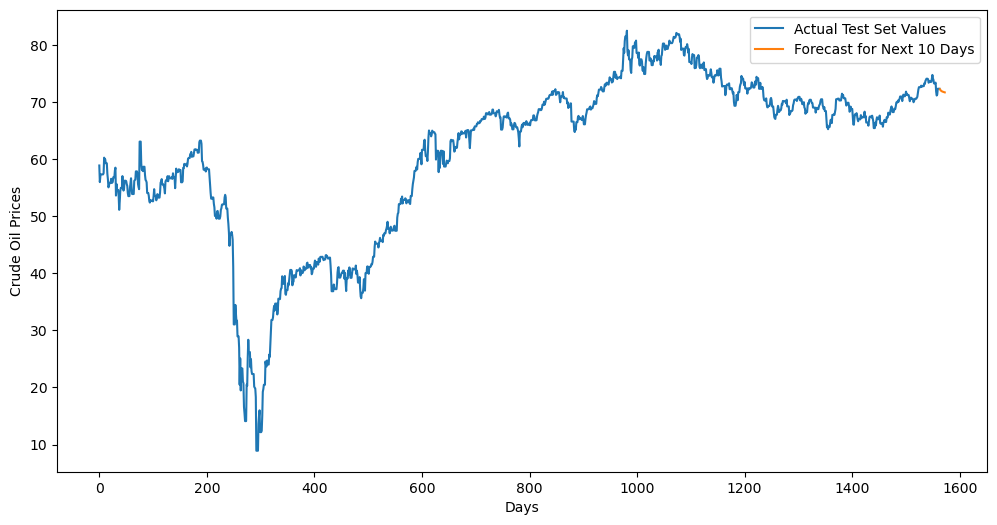

In [21]:
# Combine the actual test set values and the predictions for plotting
combined_data = np.concatenate((Y_test_O, forecasts))

# Create a range for the x-axis
test_dates = np.arange(len(Y_test_O))
forecast_dates = np.arange(len(Y_test_O), len(Y_test_O) + len(forecasts))

# Plot the actual values, test predictions, and forecasts
plt.figure(figsize=(12, 6))
plt.plot(test_dates, Y_test_O, label='Actual Test Set Values')
# plt.plot(test_dates, y_LSTM_O, label='Test Set Predictions')
plt.plot(forecast_dates, forecasts, label='Forecast for Next 10 Days')
plt.xlabel('Days')
plt.ylabel('Crude Oil Prices')
plt.legend()
plt.show()

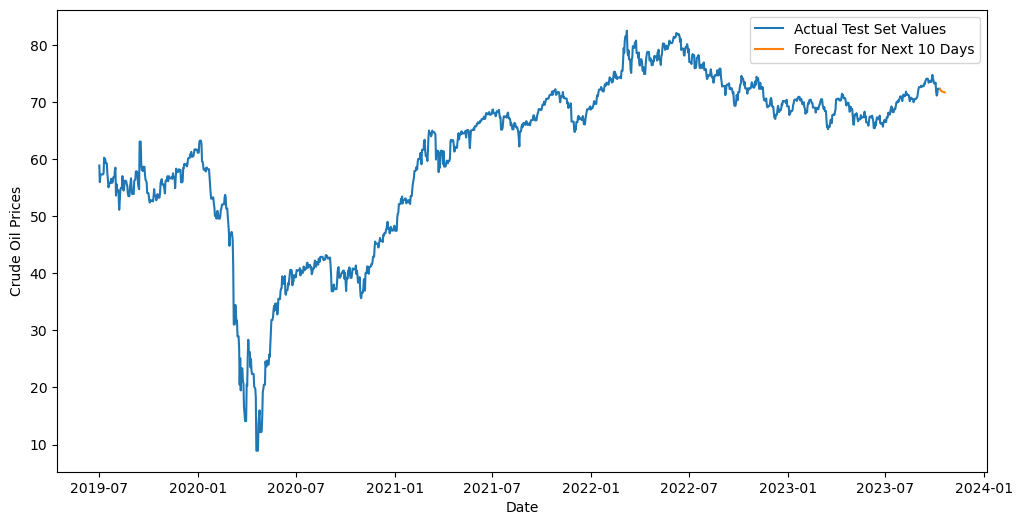

In [29]:
# Create a range of dates for the actual test set values
test_dates = pd.to_datetime(test_data.index[-len(Y_test_O):])

# Generate forecast dates starting from the last date in the test set
forecast_dates = pd.date_range(start=test_dates[-1] + timedelta(days=1), periods=len(forecasts), freq='D')

# Combine the test dates and forecast dates
all_dates = np.concatenate([test_dates, forecast_dates])

# Combine the actual test set values and the predictions for plotting
combined_data = np.concatenate((Y_test_O, forecasts))

# Plot the actual values and forecasts with the correct dates
plt.figure(figsize=(12, 6))
plt.plot(all_dates[:len(Y_test_O)], Y_test_O, label='Actual Test Set Values')
plt.plot(all_dates[len(Y_test_O):], forecasts, label='Forecast for Next {} Days'.format(len(forecasts)))
plt.xlabel('Date')
plt.ylabel('Crude Oil Prices')
plt.legend()
plt.show()

#### for 15 days

1/1 [==============================] - 0s 11ms/step


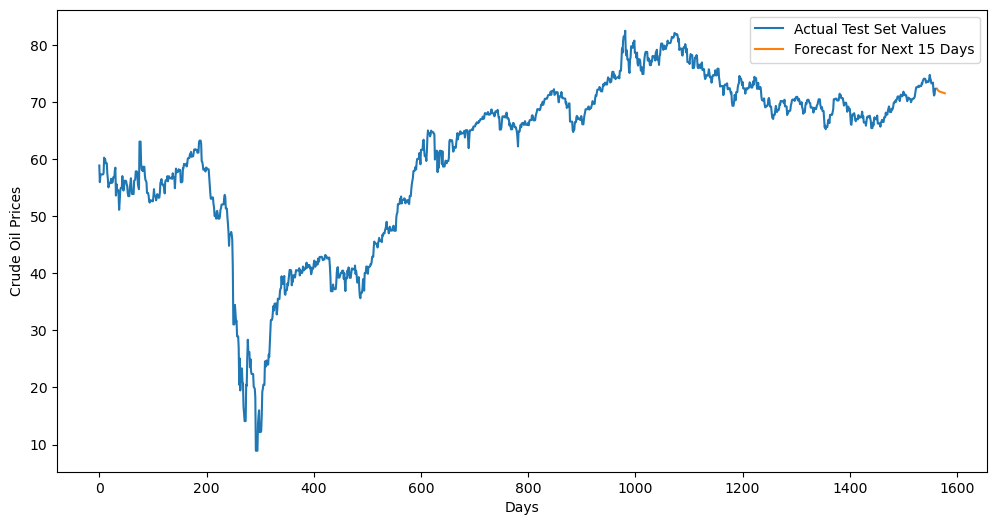

In [22]:
# Get the last sequence from the test set
last_sequence = X_test[-1]

# Reshape to match model input shape
last_sequence = np.reshape(last_sequence, (1, X_test.shape[1], 1))

# Initialize a list to store the forecasts
forecasts = []

# Forecast for the next 10 days
for _ in range(15):
    # Predict the next value
    next_value = regressorLSTM.predict(last_sequence)

    
    # Append the forecast to the list
    forecasts.append(next_value[0, 0])

    
    # Update the sequence: remove the first value and append the new prediction
    last_sequence = np.append(last_sequence[:, 1:, :], np.reshape(next_value, (1, 1, 1)), axis=1)

# Inverse transform the forecasts to get the actual values
forecasts = scaler.inverse_transform(np.array(forecasts).reshape(-1, 1))

# Combine the actual test set values and the predictions for plotting
combined_data = np.concatenate((Y_test_O, forecasts))

# Create a range for the x-axis
test_dates = np.arange(len(Y_test_O))
forecast_dates = np.arange(len(Y_test_O), len(Y_test_O) + len(forecasts))

# Plot the actual values, test predictions, and forecasts
plt.figure(figsize=(12, 6))
plt.plot(test_dates, Y_test_O, label='Actual Test Set Values')
plt.plot(forecast_dates, forecasts, label='Forecast for Next 15 Days')
plt.xlabel('Days')
plt.ylabel('Crude Oil Prices')
plt.legend()
plt.show()

#### for 25 days

1/1 [==============================] - 0s 11ms/step


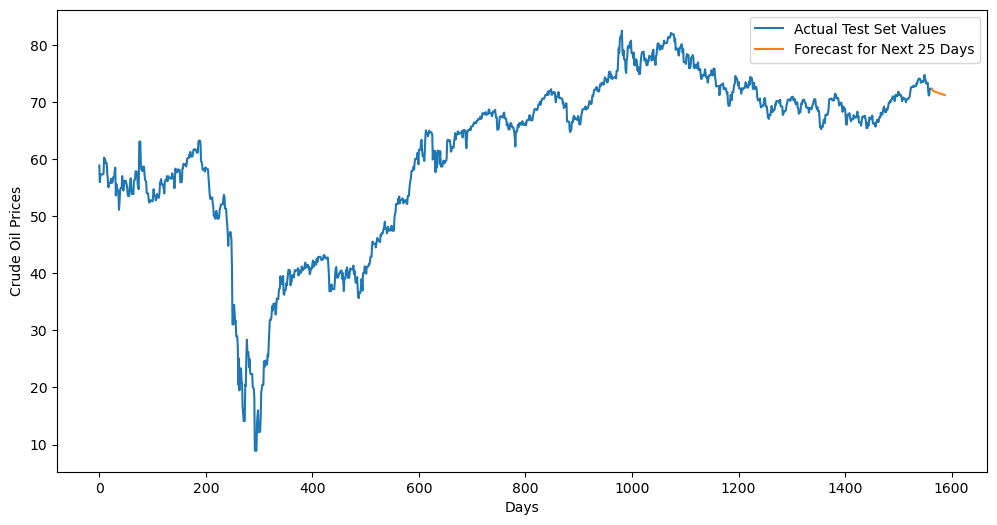

In [23]:
# Get the last sequence from the test set
last_sequence = X_test[-1]

# Reshape to match model input shape
last_sequence = np.reshape(last_sequence, (1, X_test.shape[1], 1))

# Initialize a list to store the forecasts
forecasts = []

# Forecast for the next 10 days
for _ in range(25):
    # Predict the next value
    next_value = regressorLSTM.predict(last_sequence)

    
    # Append the forecast to the list
    forecasts.append(next_value[0, 0])

    
    # Update the sequence: remove the first value and append the new prediction
    last_sequence = np.append(last_sequence[:, 1:, :], np.reshape(next_value, (1, 1, 1)), axis=1)

# Inverse transform the forecasts to get the actual values
forecasts = scaler.inverse_transform(np.array(forecasts).reshape(-1, 1))

# Combine the actual test set values and the predictions for plotting
combined_data = np.concatenate((Y_test_O, forecasts))

# Create a range for the x-axis
test_dates = np.arange(len(Y_test_O))
forecast_dates = np.arange(len(Y_test_O), len(Y_test_O) + len(forecasts))

# Plot the actual values, test predictions, and forecasts
plt.figure(figsize=(12, 6))
plt.plot(test_dates, Y_test_O, label='Actual Test Set Values')
# plt.plot(test_dates, y_LSTM_O, label='Test Set Predictions')
plt.plot(forecast_dates, forecasts, label='Forecast for Next 25 Days')
plt.xlabel('Days')
plt.ylabel('Crude Oil Prices')
plt.legend()
plt.show()

#### for 50 days

1/1 [==============================] - 0s 11ms/step


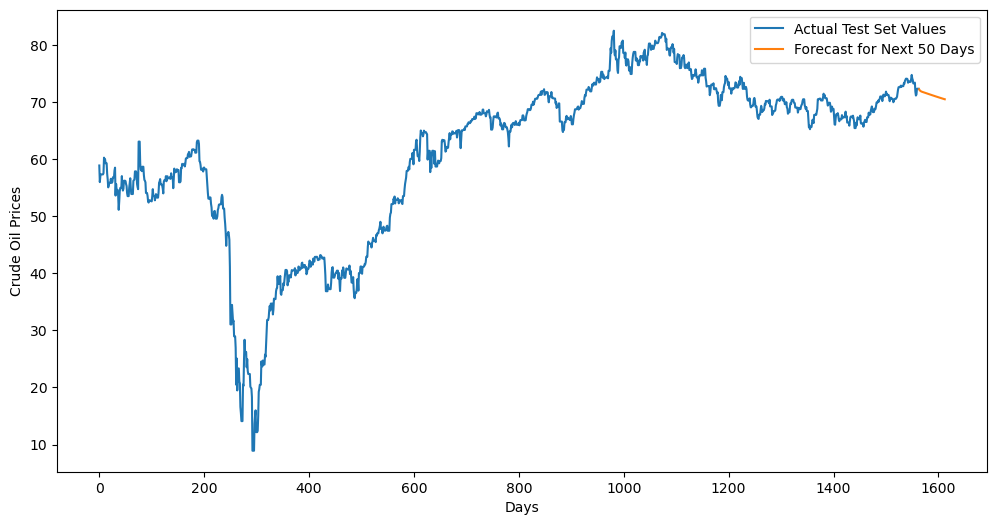

In [24]:
last_sequence = X_test[-1]
last_sequence = np.reshape(last_sequence, (1, X_test.shape[1], 1))
forecasts = []

# Forecast for the next 10 days
for _ in range(50):
    next_value = regressorLSTM.predict(last_sequence)
    forecasts.append(next_value[0, 0])
    last_sequence = np.append(last_sequence[:, 1:, :], np.reshape(next_value, (1, 1, 1)), axis=1)

forecasts = scaler.inverse_transform(np.array(forecasts).reshape(-1, 1))
combined_data = np.concatenate((Y_test_O, forecasts))

test_dates = np.arange(len(Y_test_O))
forecast_dates = np.arange(len(Y_test_O), len(Y_test_O) + len(forecasts))

plt.figure(figsize=(12, 6))
plt.plot(test_dates, Y_test_O, label='Actual Test Set Values')
plt.plot(forecast_dates, forecasts, label='Forecast for Next 50 Days')
plt.xlabel('Days')
plt.ylabel('Crude Oil Prices')
plt.legend()
plt.show()

#### for 100 days

1/1 [==============================] - 0s 12ms/step


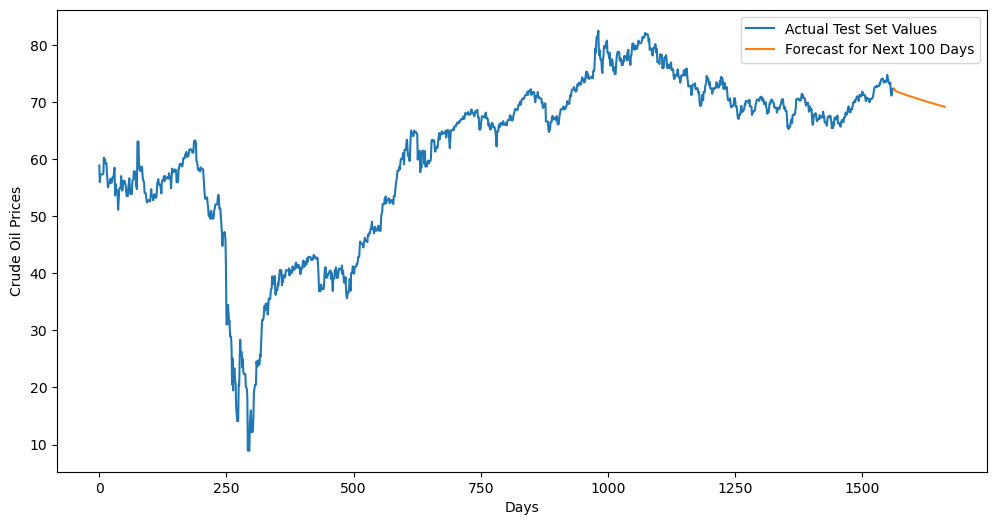

In [25]:
# Get the last sequence from the test set
last_sequence = X_test[-1]

# Reshape to match model input shape
last_sequence = np.reshape(last_sequence, (1, X_test.shape[1], 1))

# Initialize a list to store the forecasts
forecasts = []

# Forecast for the next 10 days
for _ in range(100):
    # Predict the next value
    next_value = regressorLSTM.predict(last_sequence)

    
    # Append the forecast to the list
    forecasts.append(next_value[0, 0])

    
    # Update the sequence: remove the first value and append the new prediction
    last_sequence = np.append(last_sequence[:, 1:, :], np.reshape(next_value, (1, 1, 1)), axis=1)

# Inverse transform the forecasts to get the actual values
forecasts = scaler.inverse_transform(np.array(forecasts).reshape(-1, 1))

# Combine the actual test set values and the predictions for plotting
combined_data = np.concatenate((Y_test_O, forecasts))

# Create a range for the x-axis
test_dates = np.arange(len(Y_test_O))
forecast_dates = np.arange(len(Y_test_O), len(Y_test_O) + len(forecasts))

# Plot the actual values, test predictions, and forecasts
plt.figure(figsize=(12, 6))
plt.plot(test_dates, Y_test_O, label='Actual Test Set Values')
# plt.plot(test_dates, y_LSTM_O, label='Test Set Predictions')
plt.plot(forecast_dates, forecasts, label='Forecast for Next 100 Days')
plt.xlabel('Days')
plt.ylabel('Crude Oil Prices')
plt.legend()
plt.show()

### Save the model

In [26]:
# After training the model
regressorLSTM.save('Flask App/lstm_model.h5')

/Users/thilina/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
